In [104]:
import numpy as np
import matplotlib.pyplot as plt


def normalize(x,sigma_x):
    norm = np.sum(1/sigma_x**2)
    return x / (sigma_x**2 * norm)

def theta1(x,y,sigma_x):
    x_norm = normalize(x,sigma_x)
    return (np.mean(x_norm*y)-np.mean(x_norm)*np.mean(y))/(np.mean(x_norm**2)-np.mean(x_norm)**2)

def theta1_1(x,y,sigma_x):
    return (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)

def theta0(x,y,sigma_x,th1):
    x_norm = normalize(x,sigma_x)
    return np.mean(y)-th1*np.mean(x)

    

x = np.array([10,19.7,30.2,40.4, 49.9, 60.5, 70.4, 80.0]) #Delta T deg c
y = np.array([352, 701, 1048, 1398, 1751, 2099, 2446, 2805]) #t (s)
sigma_y = np.array([5,9,9,9,9,15,15,15])


U = 12 #volts
I = 10 #amps
m=1 #1000g = 1kg
E = np.zeros(len(y))
C = np.zeros(len(y))

for i in range(0,len(y)):
    E[i] = U * I * y[i]
    C[i] = E[i]/(m*x[i])

th1 = theta1(y,x, sigma_y)
th0 = theta0(y,x,sigma_y,th1)
th1_1= theta1_1(y,x, sigma_y)


V = np.var(y)
newth1 = np.cov(y,x)[0,0]/V
#print("np.cov(x,y)/Var(x):", newth1)

chi2 = 0

for i in range(len(x)):
    chi2 += (x[i] - th0-th1*y[i])**2/(sigma_y[i]**2)
    
#print(E)
#print(C)
#print("th1 (with norm_x):", th1)
#print("th0:", th0)
#print("th1_1 (without norm_x):", th1_1)

print(C)


[4224.         4270.05076142 4164.2384106  4152.47524752 4210.82164329
 4163.30578512 4169.31818182 4207.5       ]


[7.69625637e+01 2.71043542e-04 3.52991069e-11]
chisq =  0.00545958590773831 ,     ndof =  5

 Fitted parameters and standard deviations and variance:
thetaHat[ 0 ] =  -0.2801649709435504   +-   8.772830998186866   +-   76.96256372274834
thetaHat[ 1 ] =  0.029114310481992815   +-   0.016463400064613193   +-   0.00027104354168750567
thetaHat[ 2 ] =  -1.4632483669584918e-07   +-   5.941305148071933e-06   +-   3.5299106862506056e-11

 i, j, cov[i,j], rho[i,j]:
0    0    76.96256372274834    0.9999999999999998
0    1    -0.12858792083562984    -0.8903092371805678
0    2    4.1032907999349865e-05    0.7872463846856621
1    0    -0.1285879208356298    -0.8903092371805676
1    1    0.00027104354168750567    1.0
1    2    -9.452455059927985e-08    -0.9663695365769925
2    0    4.1032907999349845e-05    0.7872463846856617
2    1    -9.452455059927984e-08    -0.9663695365769924
2    2    3.5299106862506056e-11    1.0
4195.213753721353 76.96256372274834


<Figure size 432x288 with 0 Axes>

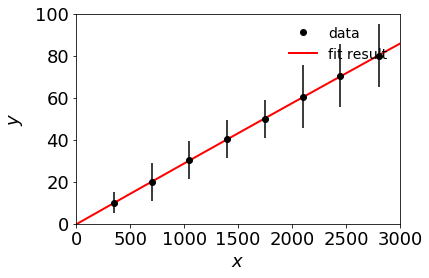

<Figure size 432x288 with 0 Axes>

In [106]:
#  simpleFit.py
#  G. Cowan / RHUL Physics / October 2017
#  Simple program to illustrate least-squares fitting with curve_fit

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chisquare

# set data values
y   = np.array([10,19.7,30.2,40.4, 49.9, 60.5, 70.4, 80.0])
x   = np.array([352, 701, 1048, 1398, 1751, 2099, 2446, 2805])
sig = np.array([5,9,9,9,9,15,15,15])
U = 12 #volts
I = 10 #amps
m=1 #1000g = 1kg
E = np.zeros(len(x))
C = np.zeros(len(x))

for i in range(0,len(x)):
    E[i] = U * I * x[i]
    C[i] = E[i]/(m*y[i])



# define fit function (order of polynomial set using numPar below).
def func(x, *theta):
    m = len(theta)
    f = 0.0
    for i in range(m):
        f += theta[i]*pow(x,i)
    return f

# set default parameter values and do the fit
numPar = 3                     # set number of parameters here
p0 = np.array(numPar*[1.0])
thetaHat, cov = curve_fit(func, x, y, p0, sig, absolute_sigma=True)

print(np.diag(cov))
# Retrieve minimized chi-squared, etc.
numPoints = len(x)
ndof = numPoints - numPar
chisq = sum(((y - func(x, *thetaHat))/sig)**2)
print("chisq = ", chisq, ",     ndof = ", ndof)

# Print fit parameters and covariance matrix
print( "\n", "Fitted parameters and standard deviations and variance:")
sigThetaHat = np.sqrt(np.diag(cov))
varThetaHat = np.diag(cov)
for i in range(len(thetaHat)):
    print("thetaHat[", i, "] = ", thetaHat[i], "  +-  ", sigThetaHat[i], "  +-  ", varThetaHat[i])

print( "\n", "i, j, cov[i,j], rho[i,j]:")
for i in range(len(thetaHat)):
    for j in range(len(thetaHat)):
        rho = cov[i][j] / (sigThetaHat[i]*sigThetaHat[j])
        print( i, "  ", j, "  ", cov[i][j], "  ", rho)

        
print(np.mean(C), varThetaHat[0])
RCF = 1 
# Set up plot
matplotlib.rcParams.update({'font.size':18})     # set all font sizes
plt.clf()
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.errorbar(x, y, yerr=sig, xerr=0, color='black', fmt='o', label='data')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$', labelpad=10)
yMin = 0
yMax = 100
xMin = 0
xMax = 3000
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
xPlot = np.linspace(xMin, xMax, 100)        # enough points for a smooth curve
fit = func(xPlot, *thetaHat)
plt.plot(xPlot, fit, 'red', linewidth=2, label='fit result')

# Tweak legend
handles, labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
handles = [handles[0][0], handles[1]]      # turn off error bar for data in legend
plt.legend(handles, labels, loc='upper right', fontsize=14, frameon=False)

# Make and store plot
plt.show()
plt.savefig("simpleFit.pdf", format='pdf')

[[ 0.2111863  -0.06460345]
 [-0.06460345  0.02341046]]
chisq =  2.2955730908118235 ,     ndof =  3

 Fitted parameters and standard deviations:
thetaHat[ 0 ] =  1.1620658858075859   +-   0.4595501040494243
thetaHat[ 1 ] =  0.6139449886560666   +-   0.15300476489410003

 i, j, cov[i,j], rho[i,j]:
0    0    0.2111862981318367    1.0
0    1    -0.06460344845942156    -0.9187934195887566
1    0    -0.06460344845942156    -0.9187934195887566
1    1    0.023410458080298825    1.0


<Figure size 432x288 with 0 Axes>

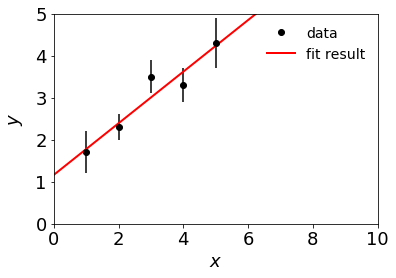

In [108]:
#  simpleFit.py
#  G. Cowan / RHUL Physics / October 2017
#  Simple program to illustrate least-squares fitting with curve_fit

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# set data values
x   = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y   = np.array([1.7, 2.3, 3.5, 3.3, 4.3])
sig = np.array([0.5, 0.3, 0.4, 0.4, 0.6])

# define fit function (order of polynomial set using numPar below).
def func(x, *theta):
    m = len(theta)
    f = 0.0
    for i in range(m):
        f += theta[i]*pow(x,i)
    return f

# set default parameter values and do the fit
numPar = 2                     # set number of parameters here
p0 = np.array(numPar*[1.0])
thetaHat, cov = curve_fit(func, x, y, p0, sig, absolute_sigma=True)

print(cov)
# Retrieve minimized chi-squared, etc.
numPoints = len(x)
ndof = numPoints - numPar
chisq = sum(((y - func(x, *thetaHat))/sig)**2)
print("chisq = ", chisq, ",     ndof = ", ndof)

# Print fit parameters and covariance matrix
print( "\n", "Fitted parameters and standard deviations:")
sigThetaHat = np.sqrt(np.diag(cov))
for i in range(len(thetaHat)):
    print("thetaHat[", i, "] = ", thetaHat[i], "  +-  ", sigThetaHat[i])

print( "\n", "i, j, cov[i,j], rho[i,j]:")
for i in range(len(thetaHat)):
    for j in range(len(thetaHat)):
        rho = cov[i][j] / (sigThetaHat[i]*sigThetaHat[j])
        print( i, "  ", j, "  ", cov[i][j], "  ", rho)

# Set up plot
matplotlib.rcParams.update({'font.size':18})     # set all font sizes
plt.clf()
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.errorbar(x, y, yerr=sig, xerr=0, color='black', fmt='o', label='data')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$', labelpad=10)
xMin = 0
xMax = 10
yMin = 0
yMax = 5
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
xPlot = np.linspace(xMin, xMax, 100)        # enough points for a smooth curve
fit = func(xPlot, *thetaHat)
plt.plot(xPlot, fit, 'red', linewidth=2, label='fit result')

# Tweak legend
handles, labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
handles = [handles[0][0], handles[1]]      # turn off error bar for data in legend
plt.legend(handles, labels, loc='upper right', fontsize=14, frameon=False)

# Make and store plot
#plt.show()
#plt.savefig("simpleFit.pdf", format='pdf')